# 30. Аппроксимация данных. Солнечная активность

http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. Изобразить данные. Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции. Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности. На какой ближайший год придется следующий пик солнечной активности?

Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8

### Аппроксимация опытных данных – 
это метод, основанный на замене экспериментально полученных данных аналитической функцией наиболее близко проходящей или совпадающей в узловых точках с исходными значениями (данными полученными в ходе опыта или эксперимента). 

### Солнечная активность — 
комплекс явлений и процессов, связанных с образованием и распадом в солнечной атмосфере сильных магнитных полей.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [13]:
x = np.array([1900,1901,1902,1903,1904,1905,1906,1907,1908,
              1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,
              1919,1920,1921,1922,1923,1924,1925,1926,1927,
              1928,1929,1930,1931,1932,1933,1934,1935,1936,
              1937,1938,1939,1940,1941,1942,1943,1944,1945,
              1946,1947,1948,1949,1950,1951,1952,1953,1954,
              1955,1956,1957,1958,1959,1960,1961,1962,
              1963,1964,1965,1966,1967,1968,1969,1970,1971,
              1972,1973,1974,1975,1976,1977,1978,1979,1980,
              1981,1982,1983,1984,1985,1986,1987,1988,1989,
              1990,1991,1992,1993,1994,1995,1996,1997,1998,
              1999,2000,2001,2002,2003,2004,2005,2006,2007,
              2008,2009,2010,2011,2012,2013,2014,2015])
y = np.array([15.7,4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9,
              73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6,
              105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7,
              129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8,
              190.6, 182.6, 148.0, 113.0, 79.2, 50.8, 27.1, 16.1, 55.3,
              154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6,
              54.2, 200.7, 269.3, 261.7, 225.1, 159.0, 76.4, 53.4,
              39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4,
              97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9,
              198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1,
              191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3,
              136.3, 173.9, 170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6,
              4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])

(1899.0, 2016.0)

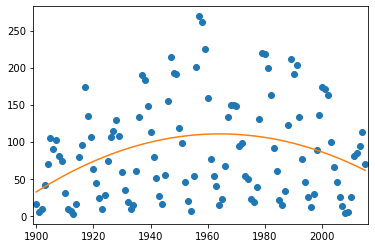

In [14]:
#сравнил разные модели аппроксимации и выбрал квадратичную
coefficients = np.polyfit(x, y, 2)
poly = np.poly1d(coefficients)
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([x[0]-1, x[-1] + 1 ])

In [15]:
#определяем, убывает функция или нет
asc = False
if(y[len(y) - 2] < y[len(y) - 1]):
    asc = True

In [16]:
ii = len(x) - 1;
#while для того, чтобы пройти этап возрастания функции
while(asc):
    if(y[ii-1] > y[ii]):
        asc = False
        ii = ii-1

In [17]:
#теперь ищем пик
res = 0
for i in range(ii,0,-1):
    if(y[i-1] < y[i]):
        res = x[i]
        break

In [18]:
#прибавляем к найденному пику 11 лет, тк цикл длится 11 лет
print('Ближайший год: ');
print(res + 11)

Ближайший год: 
2025
